In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [25]:
cwd = os.getcwd()
file_path = os.path.join(os.path.dirname(cwd), 'Data', '20230101-20231231 ERCOT Real-time Price.csv')

df = pd.read_csv(file_path)

df.head()

,Date,Price,Zone
0,1/1/2023 12:00:00 AM,-2.1100,LZ_AEN
1,1/1/2023 12:00:00 AM,-2.1075,LZ_CPS
2,1/1/2023 12:00:00 AM,-2.1150,LZ_HOUSTON
3,1/1/2023 12:00:00 AM,-2.1100,LZ_LCRA
4,1/1/2023 12:00:00 AM,-2.1200,LZ_NORTH


In [26]:
date_format = '%m/%d/%Y %I:%M:%S %p'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)
df['Day'] = df['Date'].dt.date
df['Hour'] = df['Date'].dt.hour

In [27]:
daily_avg = df.groupby('Day')['Price'].mean()

hourly_avg = df.groupby('Hour')['Price'].mean()

In [33]:
start_date = '2023-01-01'
end_date = '2023-03-31'

start_date_dt = pd.to_datetime(start_date)
end_date_dt = pd.to_datetime(end_date)

date_range_str = f"{start_date_dt.strftime('%B %d, %Y')} - {end_date_dt.strftime('%B %d, %Y')}"

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_filtered = df.loc[mask].copy()

df_filtered['Day'] = df_filtered['Date'].dt.date
df_filtered['Hour'] = df_filtered['Date'].dt.hour

daily_avg = df_filtered.groupby('Day')['Price'].mean()
hourly_avg = df_filtered.groupby('Hour')['Price'].mean()

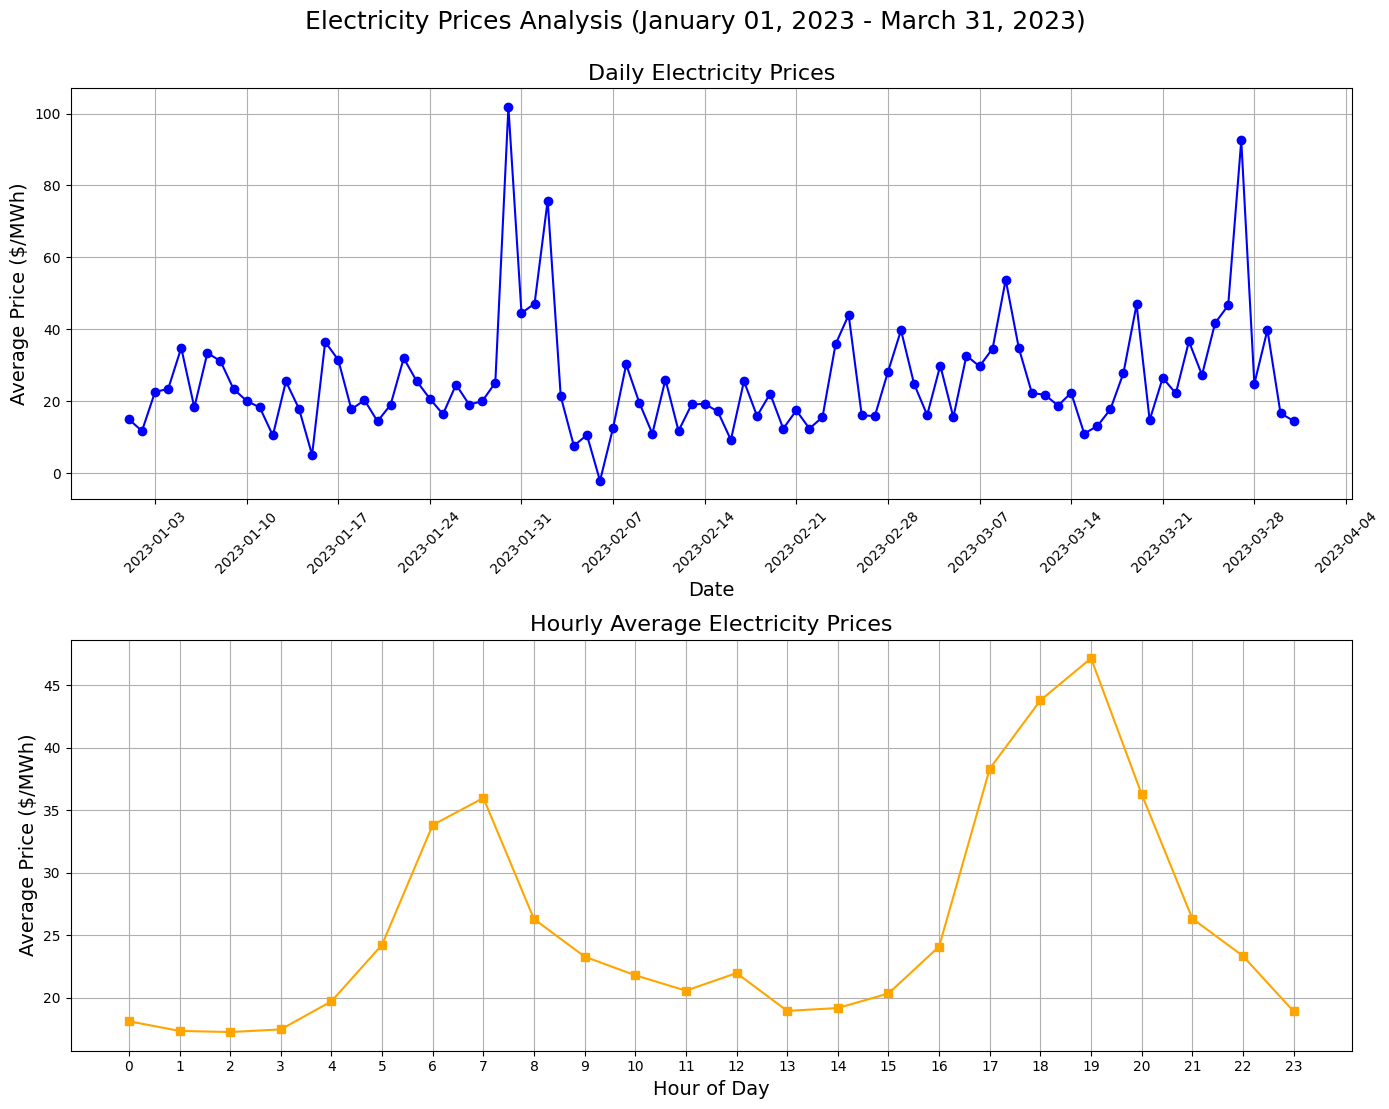

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

axs[0].plot(daily_avg.index, daily_avg.values, marker='o', linestyle='-', color='blue')
axs[0].set_title('Daily Electricity Prices', fontsize=16)
axs[0].set_xlabel('Date', fontsize=14)
axs[0].set_ylabel('Average Price ($/MWh)', fontsize=14)
axs[0].grid(True)

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)

# Subplot 2: Hourly Average Electricity Prices
axs[1].plot(hourly_avg.index, hourly_avg.values, marker='s', linestyle='-', color='orange')
axs[1].set_title('Hourly Average Electricity Prices', fontsize=16)
axs[1].set_xlabel('Hour of Day', fontsize=14)
axs[1].set_ylabel('Average Price ($/MWh)', fontsize=14)
axs[1].set_xticks(range(0, 24))  # Ensure all hours are shown
axs[1].grid(True)

fig.suptitle(f"Electricity Prices Analysis ({date_range_str})", fontsize=18, y=0.95)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()